In [19]:
import networkx as nx
import networkx.readwrite.gml as graph_reader
from networkx.algorithms.smallworld import random_reference
from networkx.algorithms.assortativity import average_degree_connectivity
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List


In [20]:
def plot_average_degree(graph_og: nx.Graph, graph_random: nx.Graph, name: str):
    key_value_og = get_k_value(average_degree_connectivity(graph_og))
    key_value_random = get_k_value(average_degree_connectivity(graph_random))
    plt.plot(key_value_og[0],key_value_og[1], label="original", color="r")
    plt.plot(key_value_random[0],key_value_random[1], label="random", color="b")
    plt.xlabel("k")
    plt.ylabel("average degree")
    plt.title(f"{name} Knn average degree")
    plt.show()


def get_k_value(knn: dict) -> Tuple[List, List]:
    keys = list(knn.keys())
    keys.sort()
    values = [knn[key] for key in keys]
    return keys, values

def solve_A02_1(name: str):
    graph_og = graph_reader.read_gml(f"data/graph_{name}.gml")
    graph_random = random_reference(graph_og, connectivity=False)
    plot_average_degree(graph_og, graph_random,name)
    print(f"Pearson Correlation coefficient Original: {nx.algorithms.assortativity.degree_pearson_correlation_coefficient(graph_og)}")
    print(f"Pearson Correlation coefficient Random: {nx.algorithms.assortativity.degree_pearson_correlation_coefficient(graph_random)}")

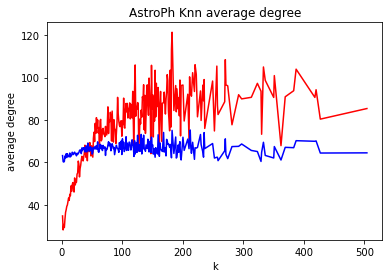

Pearson Correlation coefficient Original: 0.20131706127372712
Pearson Correlation coefficient Random: 0.01444398272825233


In [22]:
solve_A02_1("AstroPh")

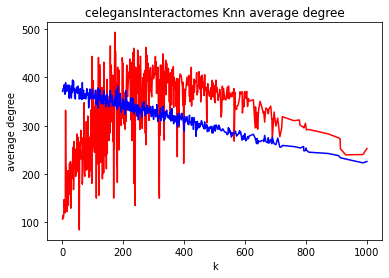

Pearson Correlation coefficient Original: 0.1516979696023134
Pearson Correlation coefficient Random: -0.16228282129160068


In [23]:
solve_A02_1("celegansInteractomes")

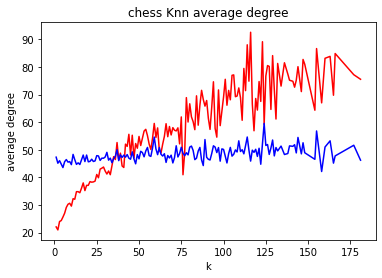

Pearson Correlation coefficient Original: 0.37051537827297576
Pearson Correlation coefficient Random: 0.033933852196421914


In [24]:
solve_A02_1("chess")

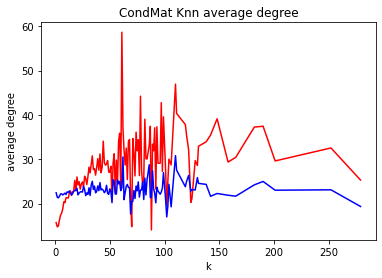

Pearson Correlation coefficient Original: 0.12528250398544813
Pearson Correlation coefficient Random: 0.010983243205178201


In [26]:
solve_A02_1("CondMat")

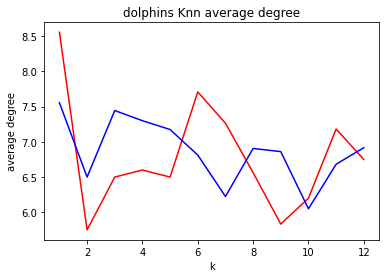

Pearson Correlation coefficient Original: -0.04359402821531297
Pearson Correlation coefficient Random: -0.07408300232844817


In [27]:
solve_A02_1("dolphins")

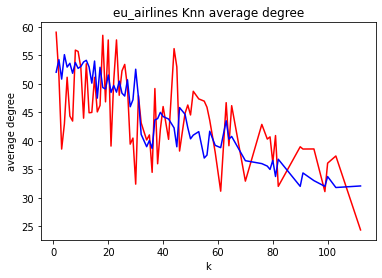

Pearson Correlation coefficient Original: -0.15180413274193774
Pearson Correlation coefficient Random: -0.22530075714550796


In [28]:
solve_A02_1("eu_airlines")

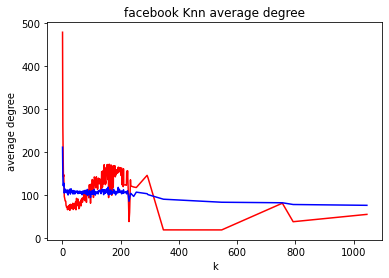

Pearson Correlation coefficient Original: 0.06357722918564918
Pearson Correlation coefficient Random: -0.03055773164786076


In [29]:
solve_A02_1("facebook")

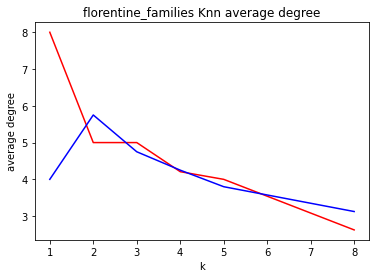

Pearson Correlation coefficient Original: -0.47862867319679436
Pearson Correlation coefficient Random: -0.33437221727515587


In [30]:
solve_A02_1("florentine_families")

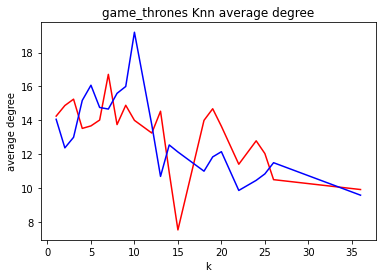

Pearson Correlation coefficient Original: -0.13076968366930314
Pearson Correlation coefficient Random: -0.18395128096868887


In [31]:
solve_A02_1("game_thrones")

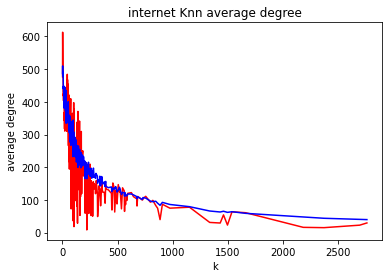

Pearson Correlation coefficient Original: -0.21486656615730274
Pearson Correlation coefficient Random: -0.1972799095070037


In [32]:
solve_A02_1("internet")

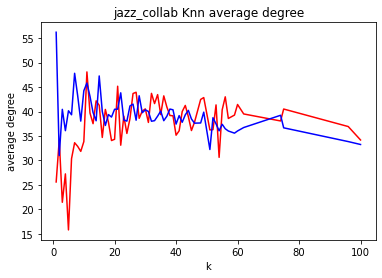

Pearson Correlation coefficient Original: 0.020237399275047276
Pearson Correlation coefficient Random: -0.07694609105550099


In [33]:
solve_A02_1("jazz_collab")

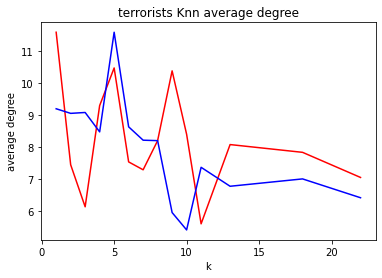

Pearson Correlation coefficient Original: -0.08047566178575669
Pearson Correlation coefficient Random: -0.17026764703828617


In [34]:
solve_A02_1("terrorists")